## 서울시 하루평균 생활인구 top5 행정동 치킨집 리뷰 데이터 분석

## 역삼1동/여의동/서초3동/서교동/진관동

## 긍정/부정 리뷰 워드클라우드 분석

### 역삼1동 리뷰데이터 분석

In [109]:
import pandas as pd
import re

import warnings
warnings.filterwarnings(action='ignore') 

# 데이터셋 불러오기
df_ys1_raw = pd.read_csv('./data/역삼1동 치킨집 카카오맵 리뷰 데이터 크롤링.csv')
df_ys1 = df_ys1_raw

# 리뷰가 없는 결측치 제거
df_ys1 = df_ys1.dropna(axis=0)

# 특수문자 제거 함수
def text_purify(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 정규식 표현
    result = hangul.sub('', text)
    return result

# 리뷰 한글 정규식 표현으로 정제(특수문자 등 제거)
df_ys1['review'] = df_ys1['review'].apply(lambda x: text_purify(x))

# 긍정/부정 (3점기준) 구분자 열 추가
df_ys1['likes'] = df_ys1['score'].apply(lambda x: 1 if float(x) > 3 else 0)

# 긍정/부정 평가 리뷰데이터 나누기
df_ys1_like = df_ys1[df_ys1['likes'] == 1]
df_ys1_dislike = df_ys1[df_ys1['likes'] == 0]

# 모든 리뷰 하나의 리스트로 합침
ys1_like_reviews = "".join(df_ys1_like['review'].tolist())
ys1_dislike_reviews = "".join(df_ys1_dislike['review'].tolist())

### 역삼1동 긍정리뷰 워드 클라우드

상위 20개 키워드 순위
[('치킨', 62), ('맛', 41), ('사장', 23), ('서비스', 15), ('배달', 12), ('최고', 12), ('포장', 11), ('주문', 11), ('매장', 11), ('통닭', 11), ('리뷰', 10), ('집', 10), ('가격', 10), ('곳', 10), ('항상', 8), ('아주', 8), ('진짜', 8), ('후라이드', 8), ('방문', 8), ('정말', 7)]


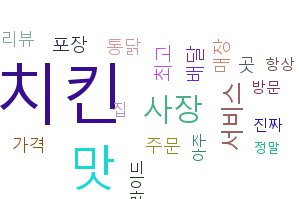

In [84]:
# 역삼1동 긍정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 긍정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_ys1_like_reviews = nouns_classify.nouns(ys1_like_reviews)
count_ys1_like_reviews = Counter(nouns_ys1_like_reviews)

# 긍정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 긍정 리뷰 키워드 정제 - stopword 제거
count_ys1_like_reviews = Counter({x : count_ys1_like_reviews[x] for x in count_ys1_like_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_ys1_like = count_ys1_like_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_ys1_like = pytagcloud.make_tags(tag_rank_ys1_like, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_ys1_like, './data/역삼1동_긍정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_ys1_like)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/역삼1동_긍정리뷰_wordcloud.jpg')


### 역삼1동 부정리뷰 워드 클라우드

상위 20개 키워드 순위
[('치킨', 48), ('맛', 42), ('주문', 28), ('분', 23), ('배달', 22), ('그냥', 15), ('직원', 15), ('가게', 14), ('튀김', 13), ('사장', 13), ('자리', 12), ('최악', 11), ('손님', 11), ('불친절', 11), ('살', 10), ('닭', 10), ('음식', 10), ('더', 10), ('요', 10), ('장사', 10)]


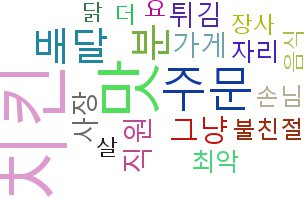

In [81]:
# 역삼1동 부정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 부정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_ys1_dislike_reviews = nouns_classify.nouns(ys1_dislike_reviews)
count_ys1_dislike_reviews = Counter(nouns_ys1_dislike_reviews)

# 부정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 부정 리뷰 키워드 정제 - stopword 제거
count_ys1_dislike_reviews = Counter({x : count_ys1_dislike_reviews[x] for x in count_ys1_dislike_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_ys1_dislike = count_ys1_dislike_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_ys1_dislike = pytagcloud.make_tags(tag_rank_ys1_dislike, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_ys1_dislike, './data/역삼1동_부정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_ys1_dislike)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/역삼1동_부정리뷰_wordcloud.jpg')

### 여의동 리뷰데이터 분석

In [67]:
import pandas as pd
import re

import warnings
warnings.filterwarnings(action='ignore') 

# 데이터셋 불러오기
df_yu_raw = pd.read_csv('./data/여의동 치킨집 카카오맵 리뷰 데이터 크롤링.csv')
df_yu = df_yu_raw

# 리뷰가 없는 결측치 제거
df_yu = df_yu.dropna(axis=0)

# 특수문자 제거 함수
def text_purify(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 정규식 표현
    result = hangul.sub('', text)
    return result

# 리뷰 한글 정규식 표현으로 정제(특수문자 등 제거)
df_yu['review'] = df_yu['review'].apply(lambda x: text_purify(x))

# 긍정/부정 (3점기준) 구분자 열 추가
df_yu['likes'] = df_yu['score'].apply(lambda x: 1 if float(x) > 3 else 0)

# 긍정/부정 평가 리뷰데이터 나누기
df_yu_like = df_yu[df_yu['likes'] == 1]
df_yu_dislike = df_yu[df_yu['likes'] == 0]

# 모든 리뷰 하나의 리스트로 합침
yu_like_reviews = "".join(df_yu_like['review'].tolist())
yu_dislike_reviews = "".join(df_yu_dislike['review'].tolist())

### 여의동 긍정리뷰 워드 클라우드

상위 20개 키워드 순위
[('치킨', 55), ('맛', 41), ('사장', 22), ('최고', 19), ('정말', 17), ('살', 14), ('배달', 13), ('주문', 13), ('자주', 11), ('곳', 11), ('바삭', 10), ('가격', 9), ('집', 9), ('후라이드', 9), ('항상', 8), ('여의도', 8), ('근처', 8), ('한강', 7), ('제일', 7), ('닭', 7)]


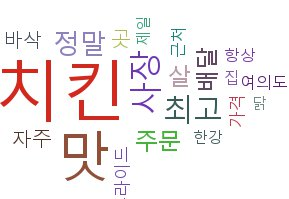

In [80]:
# 여의동 긍정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 긍정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_yu_like_reviews = nouns_classify.nouns(yu_like_reviews)
count_yu_like_reviews = Counter(nouns_yu_like_reviews)

# 긍정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 긍정 리뷰 키워드 정제 - stopword 제거
count_yu_like_reviews = Counter({x : count_yu_like_reviews[x] for x in count_yu_like_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_yu_like = count_yu_like_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_yu_like = pytagcloud.make_tags(tag_rank_yu_like, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_yu_like, './data/여의동_긍정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_yu_like)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/여의동_긍정리뷰_wordcloud.jpg')


### 여의동 부정리뷰 워드 클라우드

상위 20개 키워드 순위
[('치킨', 68), ('배달', 33), ('맛', 30), ('분', 28), ('주문', 27), ('진짜', 24), ('닭', 23), ('말', 22), ('안', 21), ('튀김', 20), ('살', 20), ('소스', 19), ('양념', 18), ('한강', 17), ('전화', 15), ('그냥', 15), ('원', 15), ('최악', 13), ('불친절', 13), ('더', 12)]


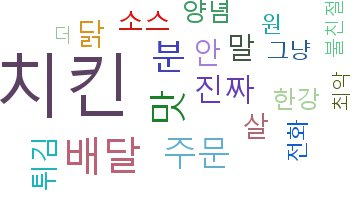

In [76]:
# 여의동 부정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 부정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_yu_dislike_reviews = nouns_classify.nouns(yu_dislike_reviews)
count_yu_dislike_reviews = Counter(nouns_yu_dislike_reviews)

# 부정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 부정 리뷰 키워드 정제 - stopword 제거
count_yu_dislike_reviews = Counter({x : count_yu_dislike_reviews[x] for x in count_yu_dislike_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_yu_dislike = count_yu_dislike_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_yu_dislike = pytagcloud.make_tags(tag_rank_yu_dislike, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_yu_dislike, './data/여의동_부정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_yu_dislike)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/여의동_부정리뷰_wordcloud.jpg')

### 서초3동 리뷰데이터 분석

In [111]:
import pandas as pd
import re

import warnings
warnings.filterwarnings(action='ignore') 

# 데이터셋 불러오기
df_sc3_raw = pd.read_csv('./data/서초3동 치킨집 카카오맵 리뷰 데이터 크롤링.csv')
df_sc3 = df_sc3_raw

# 리뷰가 없는 결측치 제거
df_sc3 = df_sc3.dropna(axis=0)

# 특수문자 제거 함수
def text_purify(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 정규식 표현
    result = hangul.sub('', text)
    return result

# 리뷰 한글 정규식 표현으로 정제(특수문자 등 제거)
df_sc3['review'] = df_sc3['review'].apply(lambda x: text_purify(x))

# 긍정/부정 (3점기준) 구분자 열 추가
df_sc3['likes'] = df_sc3['score'].apply(lambda x: 1 if float(x) > 3 else 0)

# 긍정/부정 평가 리뷰데이터 나누기
df_sc3_like = df_sc3[df_sc3['likes'] == 1]
df_sc3_dislike = df_sc3[df_sc3['likes'] == 0]

# 모든 리뷰 하나의 리스트로 합침
sc3_like_reviews = "".join(df_sc3_like['review'].tolist())
sc3_dislike_reviews = "".join(df_sc3_dislike['review'].tolist())

### 서초3동 긍정리뷰 워드클라우드

상위 20개 키워드 순위
[('치킨', 88), ('맛', 70), ('사장', 27), ('진짜', 22), ('통닭', 21), ('후라이드', 20), ('집', 19), ('닭', 19), ('가격', 18), ('곳', 16), ('주문', 15), ('튀김', 15), ('야채', 15), ('최고', 13), ('살', 13), ('소스', 12), ('정말', 12), ('배달', 11), ('바삭', 10), ('양념', 10)]


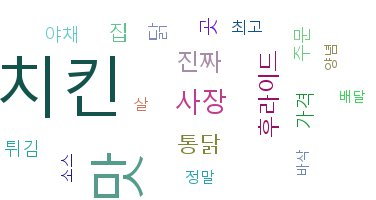

In [112]:
# 서초3동 긍정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 긍정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_sc3_like_reviews = nouns_classify.nouns(sc3_like_reviews)
count_sc3_like_reviews = Counter(nouns_sc3_like_reviews)

# 긍정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 긍정 리뷰 키워드 정제 - stopword 제거
count_sc3_like_reviews = Counter({x : count_sc3_like_reviews[x] for x in count_sc3_like_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_sc3_like = count_sc3_like_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_sc3_like = pytagcloud.make_tags(tag_rank_sc3_like, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_sc3_like, './data/서초3동_긍정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_sc3_like)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/서초3동_긍정리뷰_wordcloud.jpg')


### 서초3동 부정리뷰 워드클라우드

상위 20개 키워드 순위
[('치킨', 76), ('주문', 55), ('맛', 45), ('배달', 41), ('그냥', 23), ('정말', 21), ('전화', 20), ('쿠폰', 20), ('사장', 19), ('처음', 17), ('분', 16), ('기분', 16), ('최악', 15), ('닭', 15), ('더', 14), ('튀김', 14), ('함', 14), ('장사', 14), ('포장', 13), ('양념', 13)]


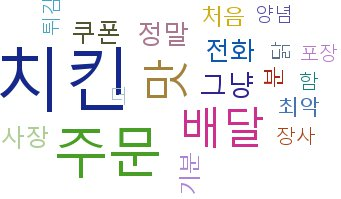

In [113]:
# 서초3동 부정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 부정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_sc3_dislike_reviews = nouns_classify.nouns(sc3_dislike_reviews)
count_sc3_dislike_reviews = Counter(nouns_sc3_dislike_reviews)

# 부정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 부정 리뷰 키워드 정제 - stopword 제거
count_sc3_dislike_reviews = Counter({x : count_sc3_dislike_reviews[x] for x in count_sc3_dislike_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_sc3_dislike = count_sc3_dislike_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_sc3_dislike = pytagcloud.make_tags(tag_rank_sc3_dislike, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_sc3_dislike, './data/서초3동_부정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_sc3_dislike)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/서초3동_부정리뷰_wordcloud.jpg')


### 서교동 리뷰데이터 분석

In [89]:
import pandas as pd
import re

import warnings
warnings.filterwarnings(action='ignore') 

# 데이터셋 불러오기
df_sg_raw = pd.read_csv('./data/서교동 치킨집 카카오맵 리뷰 데이터 크롤링.csv')
df_sg = df_sg_raw

# 리뷰가 없는 결측치 제거
df_sg = df_sg.dropna(axis=0)

# 특수문자 제거 함수
def text_purify(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 정규식 표현
    result = hangul.sub('', text)
    return result

# 리뷰 한글 정규식 표현으로 정제(특수문자 등 제거)
df_sg['review'] = df_sg['review'].apply(lambda x: text_purify(x))

# 긍정/부정 (3점기준) 구분자 열 추가
df_sg['likes'] = df_sg['score'].apply(lambda x: 1 if float(x) > 3 else 0)

# 긍정/부정 평가 리뷰데이터 나누기
df_sg_like = df_sg[df_sg['likes'] == 1]
df_sg_dislike = df_sg[df_sg['likes'] == 0]

# 모든 리뷰 하나의 리스트로 합침
sg_like_reviews = "".join(df_sg_like['review'].tolist())
sg_dislike_reviews = "".join(df_sg_dislike['review'].tolist())

### 서교동 긍정리뷰 워드 클라우드

상위 20개 키워드 순위
[('치킨', 131), ('맛', 75), ('사장', 47), ('최고', 35), ('진짜', 32), ('집', 25), ('후라이드', 24), ('가격', 21), ('매장', 21), ('곳', 20), ('정말', 20), ('맥주', 19), ('맛집', 18), ('통닭', 18), ('양념', 17), ('배달', 15), ('튀김', 15), ('점', 14), ('더', 13), ('살', 13)]


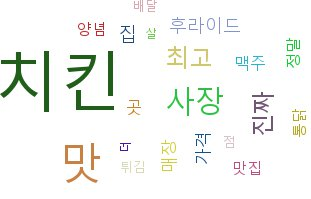

In [93]:
# 서교동 긍정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 긍정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_sg_like_reviews = nouns_classify.nouns(sg_like_reviews)
count_sg_like_reviews = Counter(nouns_sg_like_reviews)

# 긍정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 긍정 리뷰 키워드 정제 - stopword 제거
count_sg_like_reviews = Counter({x : count_sg_like_reviews[x] for x in count_sg_like_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_sg_like = count_sg_like_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_sg_like = pytagcloud.make_tags(tag_rank_sg_like, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_sg_like, './data/서교동_긍정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_sg_like)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/서교동_긍정리뷰_wordcloud.jpg')


### 서교동 부정리뷰 워드 클라우드

상위 20개 키워드 순위
[('치킨', 81), ('맛', 65), ('배달', 38), ('닭', 24), ('주문', 22), ('매장', 21), ('살', 19), ('정도', 19), ('그냥', 19), ('튀김', 18), ('안', 18), ('집', 16), ('처음', 16), ('양념', 15), ('서비스', 15), ('전화', 15), ('진짜', 14), ('점', 14), ('지점', 14), ('취소', 14)]


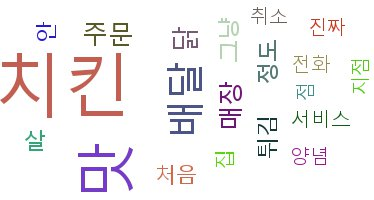

In [95]:
# 서교동 부정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 부정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_sg_dislike_reviews = nouns_classify.nouns(sg_dislike_reviews)
count_sg_dislike_reviews = Counter(nouns_sg_dislike_reviews)

# 부정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 부정 리뷰 키워드 정제 - stopword 제거
count_sg_dislike_reviews = Counter({x : count_sg_dislike_reviews[x] for x in count_sg_dislike_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_sg_dislike = count_sg_dislike_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_sg_dislike = pytagcloud.make_tags(tag_rank_sg_dislike, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_sg_dislike, './data/서교동_부정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_sg_dislike)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/서교동_부정리뷰_wordcloud.jpg')


### 진관동 리뷰데이터 분석

In [96]:
import pandas as pd
import re

import warnings
warnings.filterwarnings(action='ignore') 

# 데이터셋 불러오기
df_jg_raw = pd.read_csv('./data/진관동 치킨집 카카오맵 리뷰 데이터 크롤링.csv')
df_jg = df_jg_raw

# 리뷰가 없는 결측치 제거
df_jg = df_jg.dropna(axis=0)

# 특수문자 제거 함수
def text_purify(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 정규식 표현
    result = hangul.sub('', text)
    return result

# 리뷰 한글 정규식 표현으로 정제(특수문자 등 제거)
df_jg['review'] = df_jg['review'].apply(lambda x: text_purify(x))

# 긍정/부정 (3점기준) 구분자 열 추가
df_jg['likes'] = df_jg['score'].apply(lambda x: 1 if float(x) > 3 else 0)

# 긍정/부정 평가 리뷰데이터 나누기
df_jg_like = df_jg[df_jg['likes'] == 1]
df_jg_dislike = df_jg[df_jg['likes'] == 0]

# 모든 리뷰 하나의 리스트로 합침
jg_like_reviews = "".join(df_jg_like['review'].tolist())
jg_dislike_reviews = "".join(df_jg_dislike['review'].tolist())

### 진관동 긍정리뷰 워드 클라우드

상위 20개 키워드 순위
[('치킨', 61), ('맛', 32), ('사장', 24), ('진짜', 18), ('최고', 17), ('집', 14), ('서비스', 9), ('정말', 9), ('맛집', 8), ('직원', 7), ('튀김', 7), ('가격', 7), ('양념', 6), ('메뉴', 6), ('안', 6), ('친절', 6), ('바삭', 6), ('매콤', 6), ('떡볶이', 6), ('후라이드', 6)]


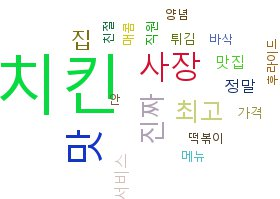

In [98]:
# 진관동 긍정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 긍정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_jg_like_reviews = nouns_classify.nouns(jg_like_reviews)
count_jg_like_reviews = Counter(nouns_jg_like_reviews)

# 긍정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 긍정 리뷰 키워드 정제 - stopword 제거
count_jg_like_reviews = Counter({x : count_jg_like_reviews[x] for x in count_jg_like_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_jg_like = count_jg_like_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_jg_like = pytagcloud.make_tags(tag_rank_jg_like, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_jg_like, './data/진관동_긍정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_jg_like)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/진관동_긍정리뷰_wordcloud.jpg')


### 진관동 부정리뷰 워드 클라우드

상위 20개 키워드 순위
[('치킨', 43), ('주문', 31), ('맛', 30), ('배달', 25), ('전화', 19), ('점', 18), ('튀김', 17), ('닭', 16), ('쿠폰', 16), ('그냥', 14), ('기름', 13), ('돈', 13), ('옷', 12), ('말', 12), ('곳', 12), ('사장', 12), ('취소', 12), ('직원', 11), ('장사', 11), ('진짜', 10)]


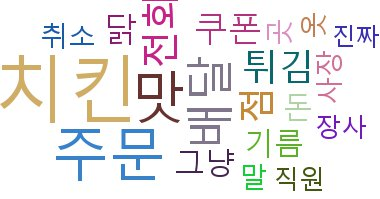

In [105]:
# 진관동 부정리뷰 워드 클라우드
from konlpy.tag import Okt
from collections import Counter

# 부정 리뷰 명사 단위 키워드 추출
nouns_classify = Okt()
nouns_jg_dislike_reviews = nouns_classify.nouns(jg_dislike_reviews)
count_jg_dislike_reviews = Counter(nouns_jg_dislike_reviews)

# 부정 리뷰 키워드 정제 - 불용어(stopword) 불러오기
stopwords_korean_path = './data/stopwords.txt'
with open(stopwords_korean_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 부정 리뷰 키워드 정제 - stopword 제거
count_jg_dislike_reviews = Counter({x : count_jg_dislike_reviews[x] for x in count_jg_dislike_reviews if x not in stopwords})

import random
import pytagcloud
import webbrowser

# 가장 많은 상위 20개 키워드
tag_rank_jg_dislike = count_jg_dislike_reviews.most_common(20)

# 최대 사이즈 지정
tag_list_jg_dislike = pytagcloud.make_tags(tag_rank_jg_dislike, maxsize = 60)

# 워드클라우드 이미지 파일 생성
pytagcloud.create_tag_image(tag_list_jg_dislike, './data/진관동_부정리뷰_wordcloud.jpg', size=(400,200), fontname = 'malgun', rectangular = False)

print("상위 20개 키워드 순위")
print(tag_rank_jg_dislike)

# 워드클라우드 이미지 불러오기
from IPython.display import Image
Image(filename = './data/진관동_부정리뷰_wordcloud.jpg')
